<a href="https://colab.research.google.com/github/jain-ze/machine-learning/blob/main/DL_W03_Avoid_vanishing_exploding_gradients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **避免梯度消失或爆炸的4種方法與實作**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

#**一、權重初始化 (Weight Initialization)**

概念：在網路訓練初期，權重的初始值對梯度流有很大的影響。如果權重太小，梯度在反向傳播時會逐漸縮小，導致梯度消失。如果權重太大，梯度可能會迅速增大，導致梯度爆炸。適當的權重初始化策略可以幫助保持梯度在合理的範圍內。
常見方法：
Xavier/Glorot 初始化： 考慮到前一層和後一層的節點數量，使權重的方差保持一致。適用於使用 Sigmoid 或 Tanh 等激活函數的網路。
He 初始化： 專為 ReLU 及其變體設計，考慮到前一層的節點數量。
實作 (以 TensorFlow/Keras 為例)**：**# 新增區段

In [ ]:
#輸出 tensorflow.keras.initializers 模組中所有不以底線開頭的名稱列表
[name for name in dir(keras.initializers) if not name.startswith('_')]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'IdentityInitializer',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'OrthogonalInitializer',
 'RandomNormal',
 'RandomUniform',
 'STFT',
 'STFTInitializer',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'stft',
 'truncated_normal',
 'variance_scaling',
 'zeros']

**用於建立一個全連接層（Dense layer）：指定用於初始化該層權重矩陣的初始化方法為 'he_normal'**
* keras.layers.Dense: 表示這是一個全連接層，也稱為密集連接層。在這種層中，每個輸入節點都與每個輸出節點相連。
    * units=10: 指定這個層有 10 個輸出節點（或稱為神經元）。
    * activation='relu': 設定這個層使用的激活函數為 ReLU（Rectified Linear Unit）。ReLU 是一個常用的激活函數，其定義為 f(x) = max(0, x)。
    * kernel_initializer='he_normal': 指定用於初始化該層權重矩陣的初始化方法為 'he_normal'。He 初始化是一種專為 ReLU 激活函數設計的權重初始化方法，有助於避免梯度消失或爆炸的問題。

總之，這段程式碼定義了一個具有 10 個輸出單元、使用 ReLU 激活函數並採用 He 初始化方法的密集層。這是一個常見的網路層配置，尤其是在卷積神經網路（CNNs）和深度前饋神經網路中。

In [ ]:
keras.layers.Dense(units=10, activation='relu', kernel_initializer='he_normal')
#定義了一個具有 10 個輸出單元、使用 ReLU 激活函數並採用 He 初始化方法的密集層

<Dense name=dense, built=False>

#**二、使用不飽和觸發函數(Activation function)**
* 概念： 傳統的激活函數如 Sigmoid 和 Tanh 在網路很深時容易出現梯度消失的問題，因為它們的梯度在輸入遠離零時會變得非常小。ReLU (Rectified Linear Unit) 及其變體（如 LeakyReLU、ELU 等）在正輸入時具有恆定的梯度 (通常為 1)，這有助於緩解梯度消失的問題。


* 常見激活函數：

ReLU： f(x) = max(0, x)

LeakyReLU： f(x) = max(αx, x)，其中 α 是一個小的正數 (例如 0.01)。
    
ELU (Exponential Linear Unit)： f(x) = α(exp(x) - 1) for x < 0, f(x) = x for x ≥ 0。


In [ ]:
# Method1 keras activations
[name for name in dir(keras.activations) if not name.startswith('_')]
#輸出 tensorflow.keras.activations(觸發函數) 模組中所有不以底線開頭的名稱列表

['celu',
 'deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'glu',
 'hard_shrink',
 'hard_sigmoid',
 'hard_silu',
 'hard_swish',
 'hard_tanh',
 'leaky_relu',
 'linear',
 'log_sigmoid',
 'log_softmax',
 'mish',
 'relu',
 'relu6',
 'selu',
 'serialize',
 'sigmoid',
 'silu',
 'soft_shrink',
 'softmax',
 'softplus',
 'softsign',
 'sparse_plus',
 'sparsemax',
 'squareplus',
 'swish',
 'tanh',
 'tanh_shrink',
 'threshold']

建立一個全連接層（Dense layer）：

* keras.layers.Dense: 表示這是一個全連接層，每個輸入節點都與每個輸出節點相連。
    * units=10: 指定這個層有 10 個輸出節點。
    * activation='selu': 設定這個層使用的激活函數為 SELU（Scaled Exponential Linear Unit）。SELU 是一種自歸一化的激活函數，旨在使網路在訓練過程中保持數值穩定，有助於減輕梯度消失和爆炸的問題。
    *kernel_initializer='lecun_normal': 指定用於初始化該層權重矩陣的初始化方法為 'lecun_normal'。LeCun 初始化是一種基於輸入單元數的權重初始化方法，通常與具有類似於 Tanh 或 Sigmoid 特性的激活函數一起使用，但在某些情況下也適用於 SELU。
總之，這段程式碼定義了一個具有 10 個輸出單元、使用 SELU 激活函數並採用 LeCun 初始化方法的密集層。SELU 和 LeCun 初始化通常被一起使用，以利用 SELU 的自歸一化特性。

In [ ]:
keras.layers.Dense(units=10, activation='selu', kernel_initializer='lecun_normal')


<Dense name=dense_1, built=False>

In [ ]:
# Method 2 keras layers
[name for name in dir(keras.layers) if 'elu' in name.lower()]
#輸出 tensorflow.keras.layers 模組中名稱包含 'elu' (不區分大小寫) 的列表

['ELU', 'LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [ ]:
keras.layers.Dense(units=300, kernel_initializer='he_normal')
keras.layers.LeakyReLU(negative_slope=0.3)


<LeakyReLU name=leaky_re_lu, built=True>

In [ ]:
# Method 3 keras.layers.Activation
keras.layers.Dense(units=300, kernel_initializer='he_normal')
keras.layers.Activation('relu')


<Activation name=activation, built=True>

#**範例1** 使用不飽和觸發函數(Activation function)使用不飽和觸發函數(Activation function)

In [ ]:
# Load Data
from tensorflow.keras.datasets import fashion_mnist
(x_train_set, y_train_set), (x_test, y_test) = fashion_mnist.load_data()

# Splite Data(分割資料)
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_set, y_train_set, test_size=0.25, random_state=1)

# Preprocessing(預處理)
x_train = x_train/255.0 #原本x值是0-255變成0-1
x_valid = x_valid/255.0
x_test = x_test/255.0

# Reset(clear 全部設定)
keras.backend.clear_session() #把先前做的一些設定全部把它clear做一個reset
np.random.seed(1)
tf.random.set_seed(1)

#建構 model
from tensorflow.keras.layers import Dense, Flatten
model = Sequential([
    keras.Input(shape=x_train.shape[1:]), # 明確定義輸入形狀
    #輸入層
    Flatten(),# Flatten層將多維數據攤平成一個一維向量
    #第1隱藏層
    Dense(300, activation='relu', kernel_initializer='he_normal'),
    #第2隱藏層
    Dense(200, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(negative_slope=0.01),
    #第3隱藏層
    Dense(100, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    #輸出層
    Dense(10, activation='softmax') #最後一個輸出層也是用Dense層，我們有10個類別所以就用10個神經元，輸出層統一用softmax這個觸發函數，把這10個類別的預測值用機率來表示
 ])

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Check Model
model.summary()  # 顯示模型摘要

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          60,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu (PReLU)                      │ (None, 100)                 │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 316,910 (1.21 MB)

 Trainable params: 316,910 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

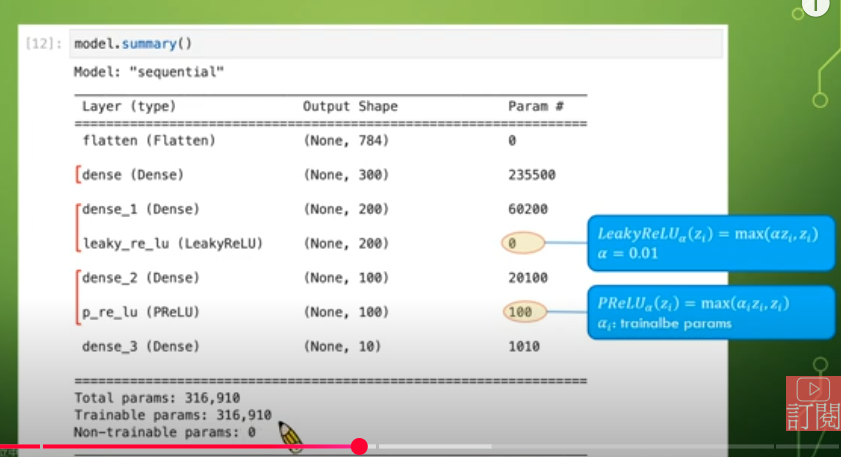

In [ ]:
# Compile 在深度學習中，模型需要在訓練前進行編譯，以確定使用的優化器、損失函數，以及需要追蹤的評估指標。
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train
train = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))
#batch_size=32(每一小批次訓練幾個樣本，預設是32個)
#epochs 進行幾個回合
#validation_data 驗證損失是否下降

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6856 - loss: 0.9641 - val_accuracy: 0.7970 - val_loss: 0.5749
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8240 - loss: 0.4978 - val_accuracy: 0.8206 - val_loss: 0.4975
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8437 - loss: 0.4423 - val_accuracy: 0.8352 - val_loss: 0.4584
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8540 - loss: 0.4098 - val_accuracy: 0.8455 - val_loss: 0.4288
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8615 - loss: 0.3868 - val_accuracy: 0.8513 - val_loss: 0.4106
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8677 - loss: 0.3685 - val_accuracy: 0.8555 - val_loss: 0.3968
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8736 - loss: 0.3530 - val_accuracy: 0.8607 - val_loss: 0.3840
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8789 - loss: 0.3395 

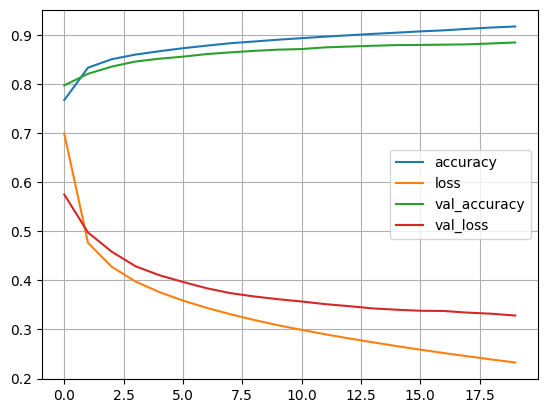

In [ ]:
#將訓練後的資料畫成圖
pd.DataFrame(train.history).plot()
plt.grid(True)
plt.show()
#X軸:epochs 進行幾個回合
#Y軸:loss與accuracy 值

In [ ]:
# Evaluate(評估)
print(x_test.shape)
model.evaluate(x_test, y_test) #test資料有102筆，10000/32=312.多，所以分313批評估，平均accuracy: 0.8668

(10000, 28, 28)
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8767 - loss: 0.3526


[0.35111141204833984, 0.8761000037193298]

In [ ]:
# Predict
y_proba = model.predict(x_test)
y_proba[:10].round(2) #顯示前10筆各類別預測機率

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.29, 0.  , 0.01, 0.  , 0.  , 0.  , 0.7 , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.02, 0.  , 0.96, 0.  , 0.02, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = np.argmax(y_proba, axis=1) #查找陣列中最大值的索引，axis=1：要求np.argmax在y_proba的每一列（axis=1）中查找最大值。
cm = confusion_matrix(y_test, y_pred)
cm

array([[913,   1,  13,  18,   3,   1,  44,   0,   7,   0],
       [  6, 970,   0,  19,   2,   0,   2,   0,   1,   0],
       [ 27,   1, 810,  17,  95,   1,  47,   0,   2,   0],
       [ 35,  13,   9, 899,  25,   0,  15,   0,   4,   0],
       [  2,   0, 112,  39, 782,   1,  58,   0,   6,   0],
       [  0,   0,   0,   1,   0, 926,   0,  56,   1,  16],
       [204,   1,  95,  27,  65,   1, 597,   0,  10,   0],
       [  0,   0,   0,   0,   0,   9,   0, 980,   1,  10],
       [  9,   1,   1,   8,   4,   3,   3,   5, 966,   0],
       [  0,   0,   0,   0,   0,   7,   1,  74,   0, 918]])

#**三、Batch Normalization 批次正規化法**
* 概念： 批次正規化是一種在每個訓練批次中對中間層的激活值進行標準化（使其具有零均值和單位方差）的技術。這有助於穩定學習過程，減少內部協變量偏移 (Internal Covariate Shift)，並允許使用更高的學習率。同時，它也有助於減輕梯度消失和爆炸的問題。

Mothed 1 After Activation Function BN層放在觸發函數之後

Mothed 2 Before Activation Function BN層放在觸發函數之前

# Mothed 1 After Activation Function BN層放在觸發函數之後

In [ ]:
# Mothed 1 After Activation Function BN層放在觸發函數之後
keras.layers.Dense(units=300, activation='relu')
keras.layers.BatchNormalization()


<BatchNormalization name=batch_normalization, built=False>

In [ ]:
#範例2
model = Sequential([
    keras.Input(shape=x_train.shape[1:]), # 明確定義輸入形狀
    #輸入層
    Flatten(),# Flatten層將多維數據攤平成一個一維向量
    #BN層
    keras.layers.BatchNormalization(),
    #BatchNormalization會把資料平均數變為0 標準差變為1所以就相當於是我們在做資料前處理的這個標準化的動作，因此如果我們在資料輸入的時候就設BatchNormalization這一個層的話，我們前面就不需要再特別的將資料做標準化這個資料經過這一層就會自動標準化了
    #第1隱藏層
    Dense(200, activation='relu' ,kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    #第2隱藏層
    Dense(100, activation='relu' ,kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    #輸出層
    Dense(10, activation='softmax') #最後一個輸出層也是用Dense層，我們有10個類別所以就用10個神經元，輸出層統一用softmax這個觸發函數，把這10個類別的預測值用機率來表示
 ])


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 784)                 │           3,136 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 200)                 │         157,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 200)                 │             800 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 182,446 (712.68 KB)

 Trainable params: 180,278 (704.21 KB)

 Non-trainable params: 2,168 (8.47 KB)

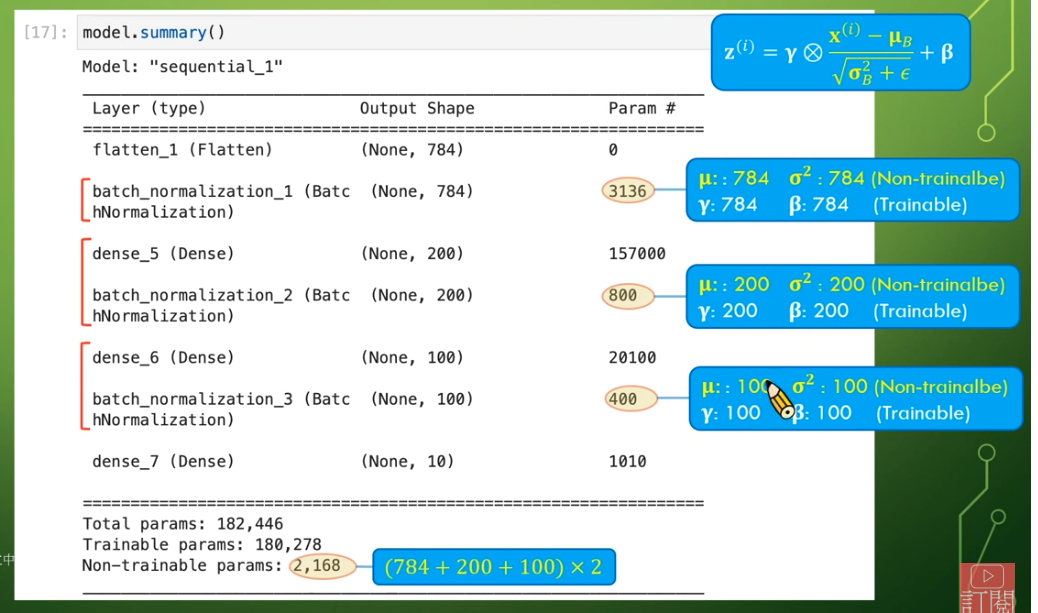

In [ ]:
# Compile 在深度學習中，模型需要在訓練前進行編譯，以確定使用的優化器、損失函數，以及需要追蹤的評估指標。
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train
train = model.fit(x_train, y_train, epochs=5, validation_data=(x_valid, y_valid))
#batch_size=32(每一小批次訓練幾個樣本，預設是32個)
#epochs 進行幾個回合
#validation_data 驗證損失是否下降

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8658 - loss: 0.3756 - val_accuracy: 0.8719 - val_loss: 0.3647
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8798 - loss: 0.3373 - val_accuracy: 0.8759 - val_loss: 0.3556
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8917 - loss: 0.3063 - val_accuracy: 0.8776 - val_loss: 0.3516
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9029 - loss: 0.2799 - val_accuracy: 0.8781 - val_loss: 0.3505
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9113 - loss: 0.2559 - val_accuracy: 0.8789 - val_loss: 0.3522


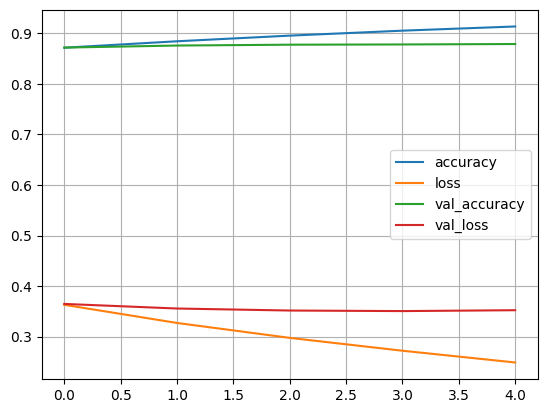

In [ ]:
#將訓練後的資料畫成圖
pd.DataFrame(train.history).plot()
plt.grid(True)
plt.show()
#X軸:epochs 進行幾個回合
#Y軸:loss與accuracy 值

In [ ]:
# Evaluate(評估)
print(x_test.shape)
model.evaluate(x_test, y_test) #test資料有102筆，10000/32=312.多，所以分313批評估，平均accuracy: 0.8668
# Predict
y_proba = model.predict(x_test)
print(y_proba[:10].round(2)) #顯示前10筆各類別預測機率
# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = np.argmax(y_proba, axis=1) #查找陣列中最大值的索引，axis=1：要求np.argmax在y_proba的每一列（axis=1）中查找最大值。
cm = confusion_matrix(y_test, y_pred)
cm

(10000, 28, 28)
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8670 - loss: 0.3892
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0.   0.   0.   0.   0.   0.02 0.   0.02 0.   0.96]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.22 0.   0.02 0.01 0.   0.   0.74 0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.97 0.   0.02 0.   0.  ]
 [0.   0.   0.   0.   0.   0.01 0.   0.99 0.   0.  ]]


array([[873,   2,  10,  35,   3,   6,  61,   0,  10,   0],
       [  5, 959,   3,  21,   6,   0,   3,   0,   3,   0],
       [ 19,   2, 850,  13,  69,   0,  43,   0,   4,   0],
       [ 25,   9,  13, 884,  30,   3,  30,   0,   5,   1],
       [  1,   0, 168,  34, 737,   0,  57,   0,   3,   0],
       [  1,   0,   1,   0,   0, 941,   0,  42,   2,  13],
       [180,   3, 115,  32,  59,   1, 598,   0,  12,   0],
       [  0,   0,   0,   0,   0,  22,   0, 957,   0,  21],
       [  8,   1,   5,   6,   5,   5,   8,   5, 957,   0],
       [  0,   0,   0,   0,   0,  14,   1,  46,   0, 939]])

# Mothed 2 Before Activation Function BN層放在觸發函數之前

In [ ]:
# Mothed 2 Before Activation Function BN層放在觸發函數之前
keras.layers.Dense(units=300, use_bias='False')
keras.layers.BatchNormalization()
keras.layers.Activation('relu')


<Activation name=activation, built=True>

範例3

In [ ]:

model = Sequential([
    keras.Input(shape=x_train.shape[1:]), # 明確定義輸入形狀
    #輸入層
    Flatten(),# Flatten層將多維數據攤平成一個一維向量
    #BN層
    keras.layers.BatchNormalization(),
    #BatchNormalization會把資料平均數變為0 標準差變為1所以就相當於是我們在做資料前處理的這個標準化的動作，因此如果我們在資料輸入的時候就設BatchNormalization這一個層的話，我們前面就不需要再特別的將資料做標準化這個資料經過這一層就會自動標準化了
    #第1隱藏層
    Dense(200,use_bias='False'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    #第2隱藏層
    Dense(100, use_bias='False'),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(negative_slope=0.01),
    #輸出層
    Dense(10, activation='softmax') #最後一個輸出層也是用Dense層，我們有10個類別所以就用10個神經元，輸出層統一用softmax這個觸發函數，把這10個類別的預測值用機率來表示
 ])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 784)                 │           3,136 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 200)                 │         157,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 200)                 │             800 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 182,446 (712.68 KB)

 Trainable params: 180,278 (704.21 KB)

 Non-trainable params: 2,168 (8.47 KB)

In [ ]:
# Compile 在深度學習中，模型需要在訓練前進行編譯，以確定使用的優化器、損失函數，以及需要追蹤的評估指標。
model.compile(optimizer=keras.optimizers.SGD(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train
train = model.fit(x_train, y_train, epochs=5, validation_data=(x_valid, y_valid))
#batch_size=32(每一小批次訓練幾個樣本，預設是32個)
#epochs 進行幾個回合
#validation_data 驗證損失是否下降

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8953 - loss: 0.2958 - val_accuracy: 0.8801 - val_loss: 0.3389
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8998 - loss: 0.2877 - val_accuracy: 0.8809 - val_loss: 0.3381
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9008 - loss: 0.2834 - val_accuracy: 0.8812 - val_loss: 0.3376
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9023 - loss: 0.2798 - val_accuracy: 0.8820 - val_loss: 0.3372
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9042 - loss: 0.2765 - val_accuracy: 0.8822 - val_loss: 0.3369


#**四、Gradient Clipping 梯度修剪**

避免梯度爆炸
 * 概念： 當梯度在訓練過程中變得非常大時，可能會導致梯度爆炸。梯度裁剪通過設定一個閾值來限制梯度的最大值。如果梯度的範數超過這個閾值，則會將其縮放到閾值大小。這可以防止梯度變得過大，從而穩定訓練過程。


In [ ]:
# Method 1 clipvalue
opt = keras.optimizers.SGD(learning_rate=1e-3, clipvalue=1.0)
#Compile 直接使用上一個範例3
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train
train = model.fit(x_train, y_train, epochs=5, validation_data=(x_valid, y_valid))


Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9053 - loss: 0.2733 - val_accuracy: 0.8825 - val_loss: 0.3366
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9064 - loss: 0.2703 - val_accuracy: 0.8823 - val_loss: 0.3364
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9075 - loss: 0.2673 - val_accuracy: 0.8826 - val_loss: 0.3362
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9089 - loss: 0.2644 - val_accuracy: 0.8826 - val_loss: 0.3360
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9102 - loss: 0.2616 - val_accuracy: 0.8828 - val_loss: 0.3359


In [ ]:
# Method 2 clipnorm
opt = keras.optimizers.SGD(clipnorm=0.9)